<h1><center>ECE 449 - Intelligent Systems Engineering<br><br>
Lab 4: Neural Networks - Self-Organizing Maps</center></h1>
<hr>
<b>Lab date:</b> <i>Thursday, October 31, 2019 -- 2:00 - 4:50 PM</i>
<br>
<b>Room:</b> <i>ETLC E5-013</i>
<br>
<b>Lab report due:</b> <i>Wednesday, November 13, 2019 -- 3:50 PM</i>
<hr>

<h2>1. Objectives</h2>
The objective of this lab is to learn the concepts behind self-organizing maps, or Kohonen networks, and apply them to real-world datasets to examine how effective they can be.

<h2>2. Expectations</h2>
Complete the pre-lab, and hand it in before the lab starts.  A formal lab report is required for this lab, which will be the completed version of this notebook.  There is a marking guide at the end of the lab manual.  If figures are required, label the axes and provide a legend when appropriate.

<h2>3. Pre-lab</h2>
1. What is the curse of dimensionality? Why is dimensionality reduction even necessary?

<h2>4. Introduction</h2>
<i>Self-organizing maps</i>, or <i>Kohonen networks</i>, are neural networks that employ <i>unsupervised learning</i>. This means, that no targets are presented to the network for training.  They map high dimensional input vectors onto a map with a lower dimension (often one- or two-dimensional, in this lab two-dimensional), and are commonly used for clustering.
<br>
In order to realize such a network, <i>competitive learning</i> is used.  This involves an input vector activating a neuron with a weight vector closest to the input vector, determined by Euclidean distance:
<br><br>
$$
tot_i = \sqrt{\sum_{j=0}^{n} (w_j - x_j)^2}
$$
<br>
The winning neuron's weights are updated to values that are closer to the input vector, according to the following formula:
<br><br>
$$
\Delta w_i = \alpha (x_i-w_i)
$$
<br>
where $\alpha$ is the learning rate.  Additionally, neurons that are close to the winning neuron are updated as well, according to a neighborhood function.  Various functions can be used, but in general, the further the neuron is from the winning neuron, the smaller its weights shift towards to the input vector.
<br>
This process is repeated for each input vector for a large number of iterations, resulting in a map that clusters data in a way that preserves the topology of the inputs, and therefore revealing similarities in the inputs when visualized.

<h2>5. Experimental Procedure / Assignment </h2>
While doing research or working as an engineer it is often important to get an intuitive grasp on the data that you are working with. With multidimensional data, this is often more complicated than "just plotting everything in one figure" because of the amount of dimensions and our lack of ability to intuitively grasp 4+ dimensional relations.  
This lab will confront you with 2 multidimensional datasets and require you to develop intuitive understanding for what is happening in those datasets. As a tool for better understanding, we will need some sort of dimensionality reduction - which will be <i>Self-Organizing maps</i>.

<b>The two datasets and exercises you will work with:</b>  
The first batch of questions (<b>Exercise 1</b>) revolve around the Iris dataset again. The Iris Dataset is a set basically every machine learning student works with at some point, usually in the early beginning and revolving around a classification task. This will be the case here. Your overall task will be to use a SOM on this dataset to cluster and to classify, outperforming an alternative classification tool. <b>Exercise 1</b> is worth 65% of the overall assignment and pretty straightforward.  
In <b>Exercise 2</b> you will work on a more obscure and mixed dataset. You will have more freedom and this exercise set will require a little more creativity and critical thinking. The overarching task here will be pattern recognition and interpretation, while the questions are more open-ended and require more fundamental understanding than in <b>Exercise 1</b>.  
<b>It is recommended to start with Exercise 1.</b>

<b>Methodology:</b> 
The lab will walk you through the fetching of the datasets and supply the basic functions needed for completing each task.  
The idea behind this is to minimize the amount of coding and programming, and encourage experimentation from your side. Each supplied code snipped will be adequately documented, so you can modify it if you feel like it (just please make a safety copy of the function first...).



Run the cell below to import the libraries required to complete this lab.

In [1]:
import sys
!{sys.executable} -m pip install minisom

# sources:
# https://en.wikipedia.org/wiki/Self-organizing_map

In [2]:
'for all the Calculations and import stuff'
import os
import numpy as np
import scipy.io as sio             # Loads .mat variables

'To plot beautiful figures'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import plot,axis,show,pcolor,colorbar,bone

'The Ai-modules of this lab'
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing  # Data preprocessing
from minisom import MiniSom        # SOM toolbox

<h3>Exercise 1:&nbsp;&nbsp; Self-organizing map on the IRIS Dataset</h3>
<br>
&emsp;<b>Task 1.1:</b>    
During this exercise you will train a SOM to cluster the dataset. As a benchmark against classification, your SOM will compete with a simple decision tree.
The exercise provides you with most of the functions that you will need. The goal is to develop a baseline understanding what SOMs are good at, and what they might have difficulties with.  
But let's start slower and at the beginning: Run the following cell to import the dataset and its description. To make sure you can properly interpret the results, you can spend the next couple of minutes reading about plants, or continue on and return when you need to give an explanation for your results.

In [3]:
'Use Scikit-learn to import the Iris Dataset, print a little literature on the set'
from sklearn import datasets
IRIS = datasets.load_iris()
print(IRIS.DESCR)

'What is a petal, what is a sepal?! ... Versicolor/Setosa/Virginica what?! ... What is an Iris flower???? '
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

&emsp;<b>Task 1.2:</b>  
Run the next cells to provide the 'naive' plots of the dataset's dimensional relations (created by projecting the data onto a two-dimensional plane):
- SepalLength  
- SepalWidth  
- PetalLength  
- PetalWidth  

In [4]:
'This cell provides some plotting. It also splits the data into SepalLength, SepalWidth, PetalLength, PetalWidth'

'The following separation is basically for you :-) '
SepalLength = IRIS.data[:,0]
SepalWidth = IRIS.data[:,1]
PetalLength = IRIS.data[:,2]
PetalWidth = IRIS.data[:,3]
y = IRIS.target # 0 == Iris Setosa, 1 == Iris Versicolor, 2 == Iris Virginica

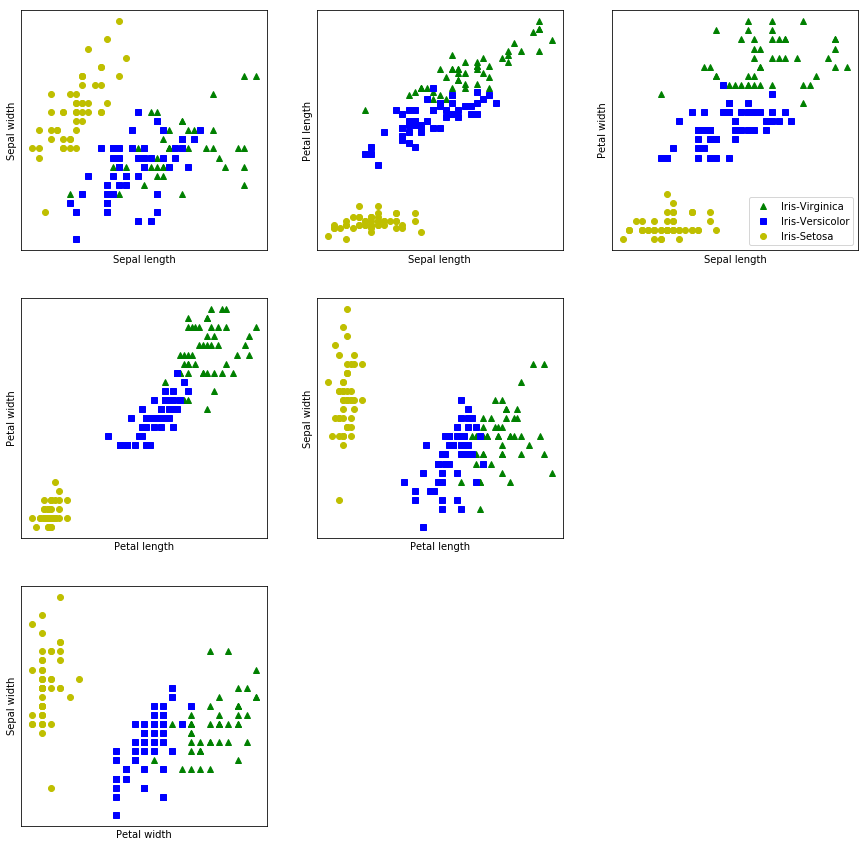

In [5]:
'All them easy plots'
plt.figure(figsize=(15,15))
plt.subplot(3, 3, 1)
plt.plot(SepalLength[y==2], SepalWidth[y==2], "g^", label="Iris-Virginica")
plt.plot(SepalLength[y==1], SepalWidth[y==1], "bs", label="Iris-Versicolor")
plt.plot(SepalLength[y==0], SepalWidth[y==0], "yo", label="Iris-Setosa")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

plt.subplot(3, 3, 2)
plt.plot(SepalLength[y==2], PetalLength[y==2], "g^", label="Iris-Virginica")
plt.plot(SepalLength[y==1], PetalLength[y==1], "bs", label="Iris-Versicolor")
plt.plot(SepalLength[y==0], PetalLength[y==0], "yo", label="Iris-Setosa")
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.xticks(())
plt.yticks(())

plt.subplot(3, 3, 3)
plt.plot(SepalLength[y==2], PetalWidth[y==2], "g^", label="Iris-Virginica")
plt.plot(SepalLength[y==1], PetalWidth[y==1], "bs", label="Iris-Versicolor")
plt.plot(SepalLength[y==0], PetalWidth[y==0], "yo", label="Iris-Setosa")
plt.xlabel('Sepal length')
plt.ylabel('Petal width')
plt.legend()
plt.xticks(())
plt.yticks(())

plt.subplot(3, 3, 4)
plt.plot(PetalLength[y==2], PetalWidth[y==2], "g^", label="Iris-Virginica")
plt.plot(PetalLength[y==1], PetalWidth[y==1], "bs", label="Iris-Versicolor")
plt.plot(PetalLength[y==0], PetalWidth[y==0], "yo", label="Iris-Setosa")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xticks(())
plt.yticks(())

plt.subplot(3, 3, 5)
plt.plot(PetalLength[y==2], SepalWidth[y==2], "g^", label="Iris-Virginica")
plt.plot(PetalLength[y==1], SepalWidth[y==1], "bs", label="Iris-Versicolor")
plt.plot(PetalLength[y==0], SepalWidth[y==0], "yo", label="Iris-Setosa")
plt.xlabel('Petal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

plt.subplot(3, 3, 7)
plt.plot(PetalWidth[y==2], SepalWidth[y==2], "g^", label="Iris-Virginica")
plt.plot(PetalWidth[y==1], SepalWidth[y==1], "bs", label="Iris-Versicolor")
plt.plot(PetalWidth[y==0], SepalWidth[y==0], "yo", label="Iris-Setosa")
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

plt.show()

&emsp;<b>Task 1.3:</b>  
Provide some comments below on the plots and the information you can extract from them. Do they provide you with an intuitive understanding of the dataset's interactions?  
Please also give a short explanation of how using a SOM could help us to represent this dataset in a more digestible way. What are the parameters we need to take care of, how does a SOM work in general, and how would you see it working here?
If you already have an idea about which parameter should be in which range, go ahead, drop the number, giving your justification.

&emsp;<b>Task 1.4:</b>  
The next cell provides a basic function *Train_and_Plot([X,Y], InData, steps)* to train a SOM of dimensionality X times Y to represent the input data after a number of training steps. After execution, it will plot the SOM, comparing it to the Iris labels. The SOM classifies each cluster as the dominant class in the cluster, yielding a classification accuracy.  
Run the cell to compile the function and the followup cell to call the function for the first time.

In [6]:
import math

def plot_legend():
    ''' Plots a legend for the colour scheme
    given by abc_to_rgb. Includes some code adapted
    from http://stackoverflow.com/a/6076050/637562'''

    # Basis vectors for triangle
    basis = np.array([[0.0, 1.0], [-1.5/np.sqrt(3), -0.5],[1.5/np.sqrt(3), -0.5]])

    fig = plt.figure()
    ax = fig.add_subplot(111,aspect='equal')

    # Plot points
    a, b, c = np.mgrid[0.0:1.0:50j, 0.0:1.0:50j, 0.0:1.0:50j]
    a, b, c = a.flatten(), b.flatten(), c.flatten()

    abc = np.dstack((a,b,c))[0]
    #abc = filter(lambda x: x[0]+x[1]+x[2]==1, abc) # remove points outside triangle
    abc = map(lambda x: x/sum(x), abc) # or just make sure points lie inside triangle ...

    data = np.dot(abc, basis)
    colours = [abc_to_rgb(A=point[0],B=point[1],C=point[2]) for point in abc]

    ax.scatter(data[:,0], data[:,1],marker=',',edgecolors='none',facecolors=colours)

    # Plot triangle
    ax.plot([basis[_,0] for _ in range(3) + [0,]],[basis[_,1] for _ in range(3) + [0,]],**{'color':'black','linewidth':3})

    # Plot labels at vertices
    offset = 0.25
    fontsize = 32
    ax.text(basis[0,0]*(1+offset), basis[0,1]*(1+offset), '$A$', horizontalalignment='center',
            verticalalignment='center', fontsize=fontsize)
    ax.text(basis[1,0]*(1+offset), basis[1,1]*(1+offset), '$B$', horizontalalignment='center',
            verticalalignment='center', fontsize=fontsize)
    ax.text(basis[2,0]*(1+offset), basis[2,1]*(1+offset), '$C$', horizontalalignment='center',
            verticalalignment='center', fontsize=fontsize)    

    ax.set_frame_on(False)
    ax.set_xticks(())
    ax.set_yticks(())

    plt.show()

def Train_and_Plot_SOM(dimensions, inputData, steps):
    dimensions = np.array(dimensions)
    inputData = np.transpose(inputData)
    # Create SOM
    som = MiniSom(
        int(dimensions[0]),                                # Number of neurons (x-axis)
        int(dimensions[1]),                                # Number of neurons (y-axis)
        np.shape(inputData)[1],             # Number of elements in an input vector
        sigma = .9,                        # Spread of the neighbourhood function
        learning_rate = 0.5,                # Initial learning rate
        neighborhood_function = 'gaussian'  # Type of neighborhood function
    )

    som.random_weights_init(inputData)  # Initialize weights of neurons randomly
    som.train_random(inputData, steps)  # Train the SOM using the input vectors in a random order (i.e. not batch training)

    # Plot distance map of the SOM

    t = IRIS.target
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(1, 1, 1)
    plt.bone()
    plt.pcolor(som.distance_map().T, cmap='Greys')
    bar = plt.colorbar()
    bar.set_label('Neuron Distance')
    
    # use different colors and markers for each label
    markers = ['o', 's', '^']
    colors = ['y', 'b', 'g']
    labels = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']
    counter = [ False, False, False]
    w_class = np.zeros([dimensions[0], dimensions[1], 3])
    for cnt, xx in enumerate(inputData):
        w = som.winner(xx)  # getting the winner
        w_class[w[0], w[1], t[cnt]] +=1
        
        # place a marker on the winning position for the sample xx
        if counter[t[cnt]] == False:
            ax.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
                     markeredgecolor=colors[t[cnt]], markersize=5, markeredgewidth=2, label=labels[t[cnt]])
            counter[t[cnt]] = True
        else:
            ax.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
                 markeredgecolor=colors[t[cnt]], markersize=5, markeredgewidth=2)
    ax.axis([0, dimensions[0], 0, dimensions[1]])
    ax.legend(loc=2, mode='expand', numpoints=1, ncol=4, fancybox = True)
    plt.title(''.join([str(dimensions[0]), 'x' ,str(dimensions[1]),  ' SOM, after ' , str(steps) ,' training steps']))
    plt.show()

    
    Class_acc = np.sum(np.amax(w_class, 2)) / np.sum(w_class)
    print("classification Accuracy: ", Class_acc)



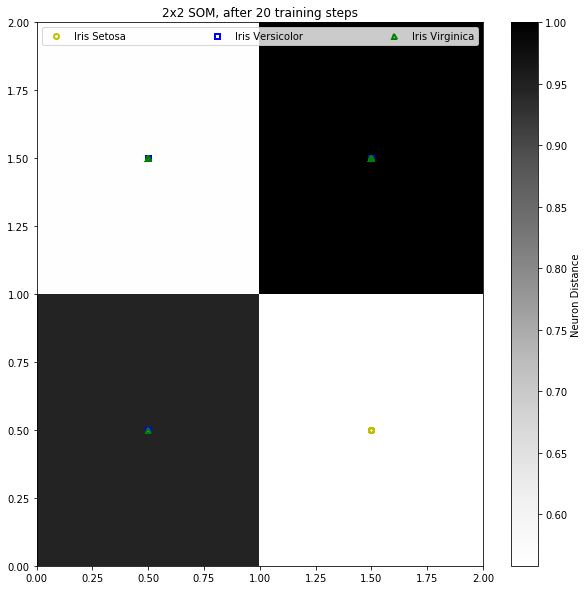

classification Accuracy:  0.62


In [72]:
Train_and_Plot_SOM(dimensions=[2, 2], inputData=[SepalLength, SepalWidth], steps=20)
#InputData can be any combination of SepalLength, SepalWidth, PetalLength, PetalWidth

&emsp;<b>Task 1.5:</b>  
In your next task, please:  
<b>1.</b> Comment on the quality of the above SOM - Does this provide any valuable insight? Why or why not? What do you need to change?  

<b>2.</b> In the python cell below, experiment on your own with some function calls to properly cluster the samples. What parameters lead to a result that looks 'well clustered' to you?

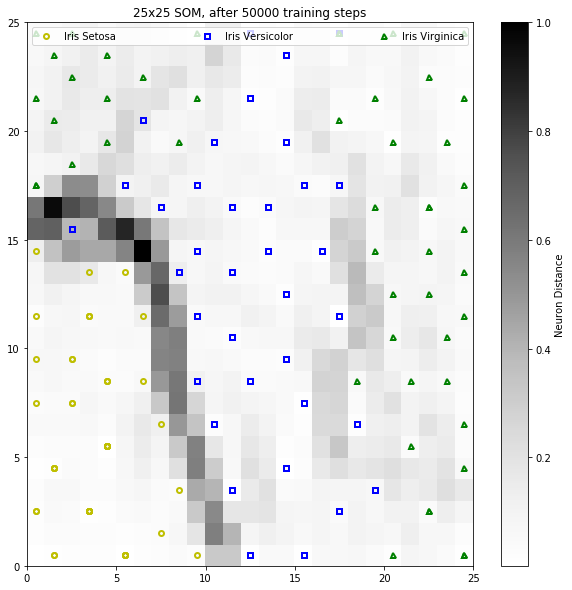

classification Accuracy:  0.9933333333333333


In [42]:
# Train_and_Plot_SOM(dimensions=[4,4], inputData=[PetalWidth, PetalLength], steps=1)
# Train_and_Plot_SOM(dimensions=[4,4], inputData=[PetalWidth, PetalLength], steps=20)
# Train_and_Plot_SOM(dimensions=[4,4], inputData=[PetalWidth, PetalLength], steps=8192)
# Train_and_Plot_SOM(dimensions=[4,4], inputData=[PetalWidth, PetalLength], steps=4096)
# Train_and_Plot_SOM(dimensions=[100,100], inputData=[PetalWidth, PetalLength], steps=1)
# Train_and_Plot_SOM(dimensions=[1000,20], inputData=[PetalWidth, PetalLength], steps=1)
# Train_and_Plot_SOM(dimensions=[20,1000], inputData=[PetalWidth, PetalLength], steps=1)
# Train_and_Plot_SOM(dimensions=[2,600], inputData=[PetalWidth, PetalLength], steps=1)
# Train_and_Plot_SOM(dimensions=[25,25], inputData=[PetalWidth, PetalLength], steps=1)
# Train_and_Plot_SOM(dimensions=[25,25], inputData=[PetalWidth, PetalLength], steps=25)
# Train_and_Plot_SOM(dimensions=[50, 50], inputData=[PetalWidth, PetalLength], steps=16834)
# Train_and_Plot_SOM(dimensions=[24,25], inputData=[PetalWidth, PetalLength], steps=20000)
# Train_and_Plot_SOM(dimensions=[25,25], inputData=[PetalWidth, PetalLength], steps=20000)
# Train_and_Plot_SOM(dimensions=[24,25], inputData=[PetalWidth, PetalLength], steps=1000000)
# Train_and_Plot_SOM(dimensions=[25,25], inputData=[PetalWidth, PetalLength], steps=1000000) ##
# Train_and_Plot_SOM(dimensions=[25,25], inputData=[PetalWidth, PetalLength], steps=100000)
# Train_and_Plot_SOM(dimensions=[25,25], inputData=[PetalWidth, PetalLength], steps=8192)
# Train_and_Plot_SOM(dimensions=[100,100], inputData=[PetalWidth, PetalLength], steps=20000)
# Train_and_Plot_SOM(dimensions=[25,25], inputData=[PetalWidth, PetalLength], steps=2**16)
# Train_and_Plot_SOM(dimensions=[20, 20], inputData=[PetalWidth, PetalLength], steps=400)
# Train_and_Plot_SOM(dimensions=[7, 7], inputData=[SepalWidth, SepalLength], steps=50000)
# Train_and_Plot_SOM(dimensions=[7, 7], inputData=[PetalWidth, PetalLength], steps=50000)
Train_and_Plot_SOM(dimensions=[25, 25], inputData=[PetalWidth, PetalLength], steps=50000)
# Train_and_Plot_SOM(dimensions=[25, 25], inputData=[SepalWidth, SepalLength], steps=50000)

#we seem to get the best results when the dimensions are large, and steps are large
#using PetalWidth, PetalLength, or both also seem to work best since they have higher class correlations

&emsp;<b>Task 1.6:</b>  
Provide a few comments about how helpful you find the above SOM.  Did anything surprise you?

&emsp;<b>Task 1.7:</b>  
Now, beginning with the SOM from <b>1.5.2</b> try to outperform the decision tree in the cell below. The decision tree is probably the simplest way to classify a dataset.  
Your goal should be to just barely match the performance of the decision tree with as few parameters as possible!   
Run the cell below to initialize your benchmark decision tree, then see how well SOM fares as a classifier, and finally comment on your resulting SOM.  Is it smaller or larger than the SOM from **1.5.2**, did that surprise you?

This Decision tree's accuracy is:  0.96


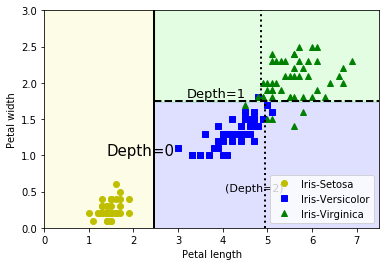

In [14]:
'Building a Decision Tree'

Benchmark_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
Benchmark_tree.fit(IRIS.data[:,2:], IRIS.target)
print("This Decision tree's accuracy is: ", Benchmark_tree.score(IRIS.data[:,2:], IRIS.target))

'Plotting the Decision boundaries'
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    plt.axis(axes)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")

plot_decision_boundary(Benchmark_tree, IRIS.data[:,2:], IRIS.target)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.legend()

plt.show()


Match the performance of the decision tree in the cell below

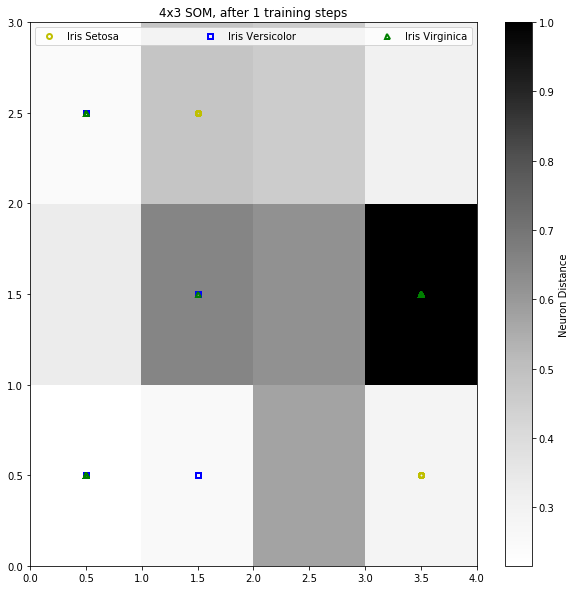

classification Accuracy:  0.96


In [71]:
#Train_and_Plot_SOM(dimensions=[4,4], inputData=[PetalWidth, PetalLength], steps=1) # got 0.97333333334 accuracy with this
Train_and_Plot_SOM(dimensions=[4,3], inputData=[PetalWidth], steps=1)

Provide your answer in the cell below:

<h3>Exercise 2: Self-organizing maps with Real-world Energy Data</h3>
<br>
In this exercise, you will be tasked to explore a provided dataset a little more independently. The dataset that you will be working with is energy consumption data of an industrial park. The park's owner has heard that you are taking an artificial intelligence course and asks you to use 'this machine learning stuff' to help with analyzing patterns in the park's energy consumption. Luckily, you remember that SOMs are considered 'machine learning stuff', and that they could actually be used for such a task.
The dataset that the park provided looks like this:
<ul>
    <li>Energy consumed for each hour of the day in kWh (on the order of $10^{14}$)</li>
    <li>Day of the week (0, 1,..., 6)</li>
    <li>Month (1, 2,..., 12)</li>
    <li>Holiday (1 = workday, 2 = holiday)</li>

&emsp;<b>Task 2.1:</b>   
Run the cells below. The first cell loads the dataset, does some slight preprocessing and packages it all in one array per day, separated into months. The dataset is then organized in the following way:
February contains 28 arrays, for the 28 days in February.
Each of those days, has in the 0th index the Weekday, the 1st index the Month, the 2nd index the type of day, and the rest is 24 power values for each hour of the day.  
The second cell defines the EnergySOM function, and the third cell calls it for an exemplary dataset.


In [9]:
# Load input data
dataset = sio.loadmat('somdata.mat')
dayInfo = dataset['dayInfo'].astype(float)
rawHourlyEnergy = dataset['rawHourlyEnergy']


# Scale the data to the interval [0, 1] for each dimension
iScaler = preprocessing.MinMaxScaler()
rawHourlyEnergy = iScaler.fit_transform(rawHourlyEnergy)
dayInfo[:,0] = (1.0/np.amax(dayInfo[:,0]))*dayInfo[:,0]
dayInfo[:,1] = (1.0/np.amax(dayInfo[:,1]))*dayInfo[:,1]
dayInfo[:,2] = (1.0/np.amax(dayInfo[:,2]))*dayInfo[:,2]

# Combine variables to obtain full input vector arrays
inputData = np.hstack((dayInfo, rawHourlyEnergy))

# Split the data into months
january = inputData[0:31, :]
february = inputData[31:59, :]
march = inputData[59:90, :]
april = inputData[90:120, :]
may = inputData[120:151, :]
june = inputData[151:181, :]
july = inputData[181:212, :]
august = inputData[212:243, :]
september = inputData[243:273, :]
october = inputData[273:304, :]
november = inputData[304:334, :]
december = inputData[334:, :]

In [10]:
'Energy Som Function'
def EnergySOM(dimensions, InputCollection, steps, name):
    dimensions = np.array(dimensions) # From list to np.array
    
    'Stacking the input data'
    inputData = InputCollection[0]
    if len(InputCollection) > 0:
        for month in range(len(InputCollection)):
            inputData = np.append(inputData, InputCollection[month], axis=0)
    
    'Create SOM'
    som = MiniSom(
        int(dimensions[0]),                                # Number of neurons (x-axis)
        int(dimensions[1]),                                # Number of neurons (y-axis)
        np.shape(inputData)[1],             # Number of elements in an input vector
        sigma = .5,                        # Spread of the neighbourhood function
        learning_rate = 0.5,                # Initial learning rate
        neighborhood_function = 'gaussian',  # Type of neighborhood function
        random_seed = 42 
    )

    'Train SOM'
    som.random_weights_init(inputData)  # Initialize weights of neurons randomly
    som.train_random(inputData, steps)  # Train the SOM using the input vectors in a random order (i.e. not batch training)
    
    'Plot the SOM using color plots'
    plt.bone()  # Set color map
    plt.pcolor(som.activation_response(inputData).T)  # Plot the number of hits on each neuron for a given set of input data
    bar = plt.colorbar()
    bar.set_label('Neuron Activation Level')
    plt.axis([0, dimensions[0], 0, dimensions[1]])
    plt.xlabel('Neuron Number')
    plt.ylabel('Neuron Number')
    plt.title("Neuron Activation Map: " + " " + name)
    plt.show()

   

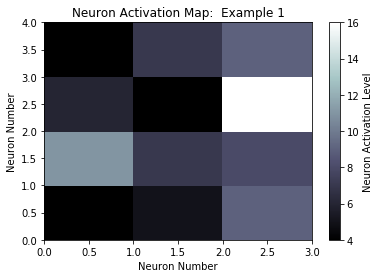

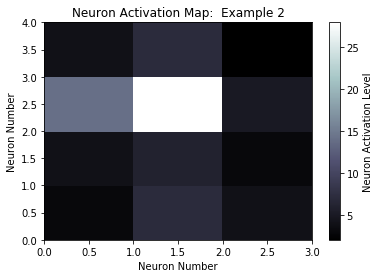

In [46]:
EnergySOM([3,4], [january[:, 1:20], february[:, 1:20]], 2000, 'Example 1')
EnergySOM([3,4], [february[:, 1:25], march[:, 1:25]], 1870, 'Example 2')

&emsp;<b>Task 2.2:</b>  
Ok, now it's your turn! You have to find some patterns in the data.
This is purposely a more open ended question!
Some ideas worth thinking about:  
- Look for seasonal dependencies. Maybe January and December look similar, while June will look completely different?  
- Maybe it is easier if you omit some data (like the month identifier?) to raise the sensitivity to other data?  
- Possibly it makes sense to bundle similar months?  
- To start it could be useful to plot all months for themselves at first?

In the cell below, please provide your function calls.

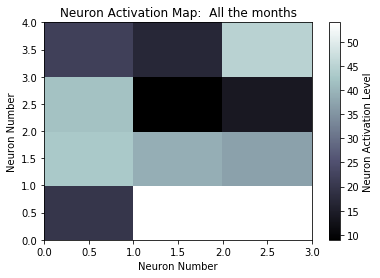

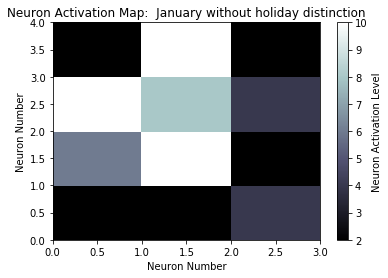

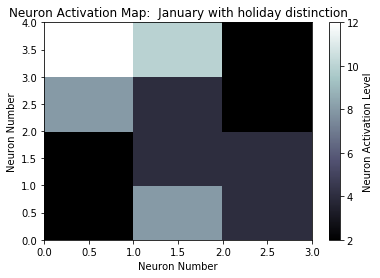

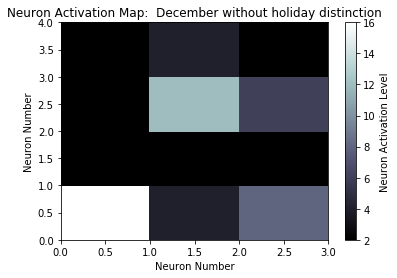

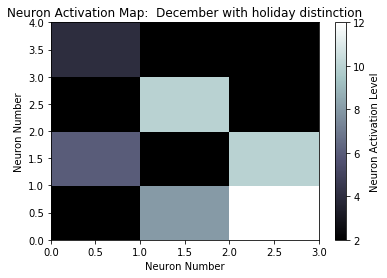

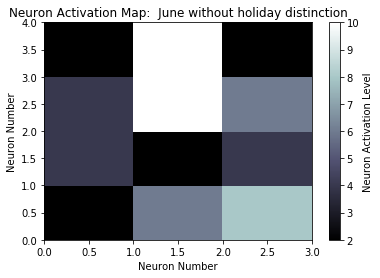

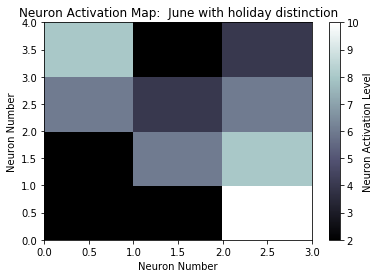

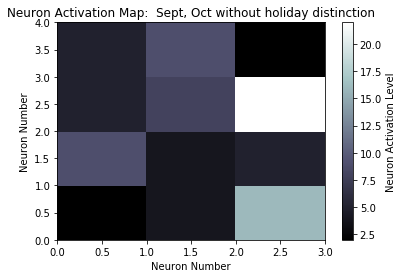

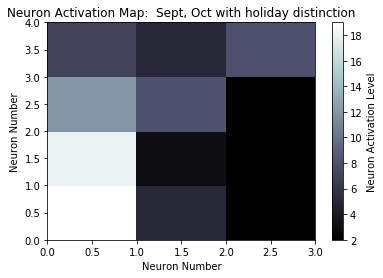

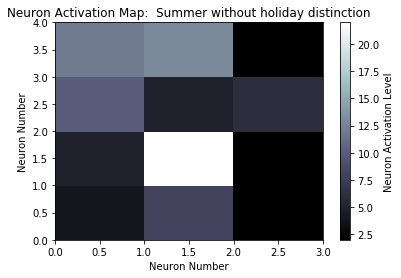

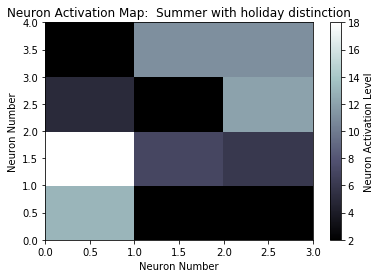

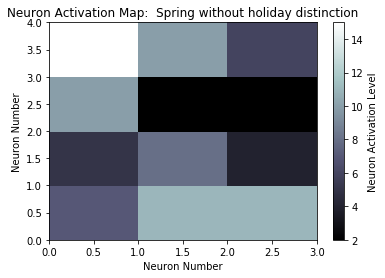

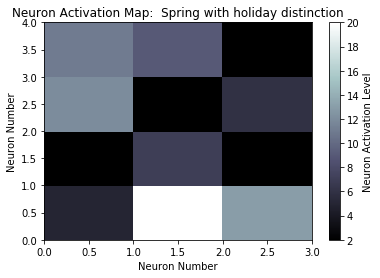

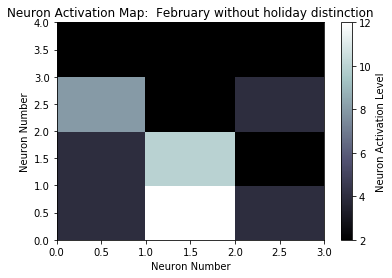

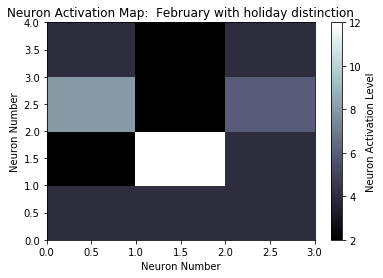

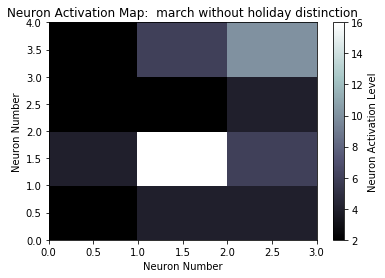

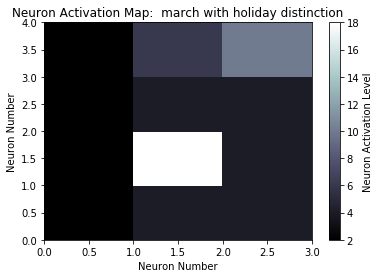

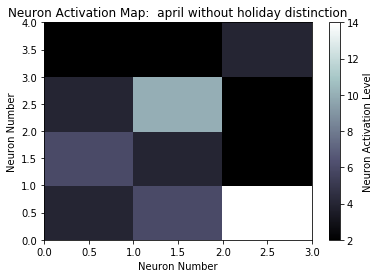

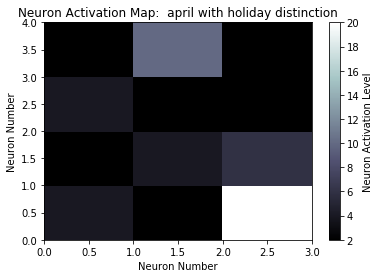

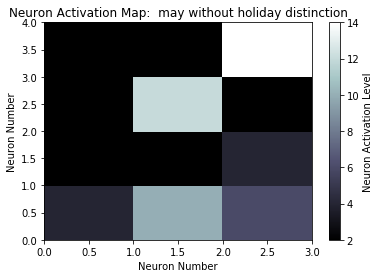

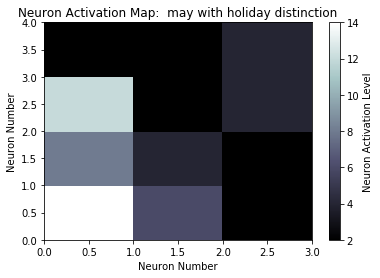

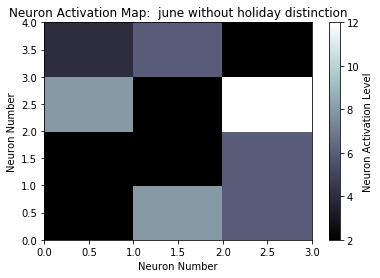

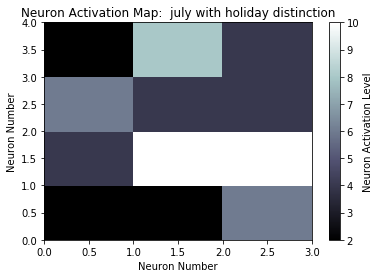

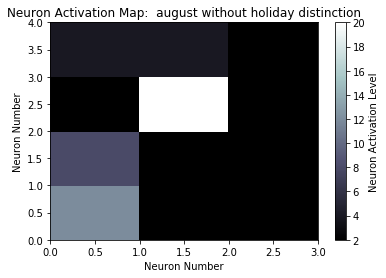

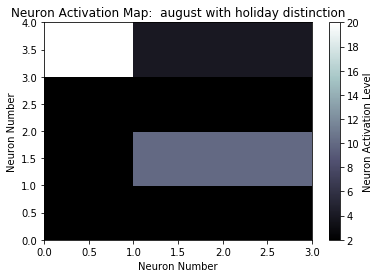

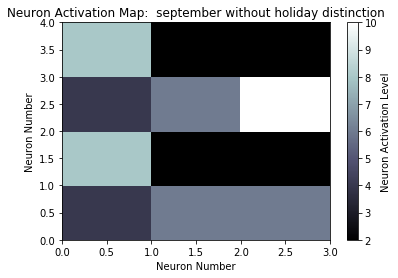

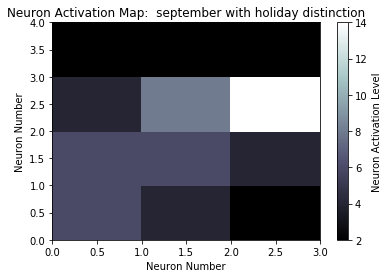

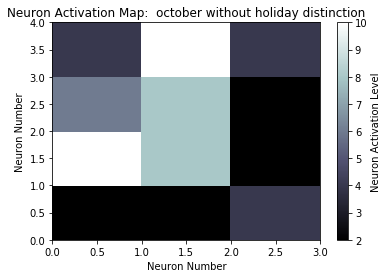

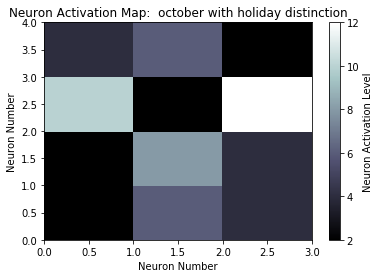

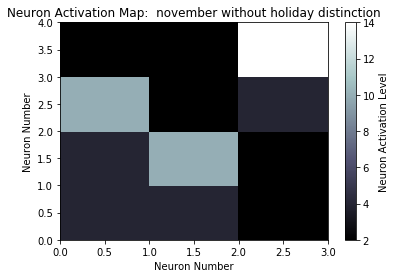

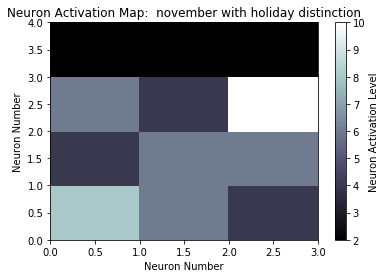

In [25]:
# EnergySOM([100,100], [january[:, 1:25], february[:, 1:25]], 1870, 'Example 2')
# EnergySOM([100,100], [january[:, 1:25], february[:, 1:25]], 2000, 'Example 2')
# EnergySOM([50,50], [january, february], 10000, 'Example 2')
EnergySOM([3,4], [january, february, march, april, may, june, july, august, september, october, november, december], 10000, 'All the months')
EnergySOM([3,4], [january[:, 3:]], 10000, 'January without holiday distinction')
EnergySOM([3,4], [january[:, 2:]], 10000, 'January with holiday distinction')
EnergySOM([3,4], [december[:, 3:]], 10000, 'December without holiday distinction')
EnergySOM([3,4], [december[:, 2:]], 10000, 'December with holiday distinction')
EnergySOM([3,4], [june[:, 3:]], 10000, 'June without holiday distinction')
EnergySOM([3,4], [june[:, 2:]], 10000, 'June with holiday distinction')
EnergySOM([3,4], [september[:, 3:], october[:, 3:]], 10000, 'Sept, Oct without holiday distinction')
EnergySOM([3,4], [september[:, 2:], october[:, 2:]], 10000, 'Sept, Oct with holiday distinction')
EnergySOM([3,4], [june[:, 3:], july[:, 3:]], 10000, 'Summer without holiday distinction')
EnergySOM([3,4], [june[:, 2:], july[:, 2:]], 10000, 'Summer with holiday distinction')
EnergySOM([3,4], [june[:, 3:], july[:, 3:]], 10000, 'Spring without holiday distinction')
EnergySOM([3,4], [june[:, 2:], july[:, 2:]], 10000, 'Spring with holiday distinction')
EnergySOM([3,4], [february[:, 3:]], 10000, 'February without holiday distinction')
EnergySOM([3,4], [february[:, 2:]], 10000, 'February with holiday distinction')
EnergySOM([3,4], [march[:, 3:]], 10000, 'march without holiday distinction')
EnergySOM([3,4], [march[:, 2:]], 10000, 'march with holiday distinction')
EnergySOM([3,4], [april[:, 3:]], 10000, 'april without holiday distinction')
EnergySOM([3,4], [april[:, 2:]], 10000, 'april with holiday distinction')
EnergySOM([3,4], [may[:, 3:]], 10000, 'may without holiday distinction')
EnergySOM([3,4], [may[:, 2:]], 10000, 'may with holiday distinction')
EnergySOM([3,4], [june[:, 3:]], 10000, 'june without holiday distinction')
EnergySOM([3,4], [july[:, 2:]], 10000, 'july with holiday distinction')
EnergySOM([3,4], [august[:, 3:]], 10000, 'august without holiday distinction')
EnergySOM([3,4], [august[:, 2:]], 10000, 'august with holiday distinction')
EnergySOM([3,4], [september[:, 3:]], 10000, 'september without holiday distinction')
EnergySOM([3,4], [september[:, 2:]], 10000, 'september with holiday distinction')
EnergySOM([3,4], [october[:, 3:]], 10000, 'october without holiday distinction')
EnergySOM([3,4], [october[:, 2:]], 10000, 'october with holiday distinction')
EnergySOM([3,4], [november[:, 3:]], 10000, 'november without holiday distinction')
EnergySOM([3,4], [november[:, 2:]], 10000, 'november with holiday distinction')


What are the insights you gained (if any) and what was your thought process behind your solution?  Remember we cannot read your thoughts, so everything you communicate that sounds like smart, logical engineering behavior is god input :-) (i.e. Deus Ex Machina).

Additionally:  
Be critical, what problems do you see with using SOM in such a task? What do you think the SOM learns to represent, etc...

<h2>Abstract</h2>

<h2>Introduction</h2>

<h2>Conclusion</h2>

<center>
<h3>Lab 4 Marking Guide</h3>
<hr>
</center>

\begin{array}{@{}clcc@{}}
\textbf{Exercise} & \textbf{Item}           & \textbf{Total Marks} & \textbf{Earned Marks} \\ 
\hline
                  & Pre-lab                 & 10                     &               \\ 
                  & Abstract                & 3                     &               \\ 
                  & Introduction            & 3                     &               \\
                  & Conclusion              & 4                     &               \\
1                 & Clustering 	            & 63                     &               \\
2                 & Pattern recognition     & 17                 	&               \\
\hline
                  & \textbf{TOTAL}          & 100                    &
\end{array}